In [11]:
from definitions import ROOT_DIR
%cd $ROOT_DIR
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from copy import copy

print("Dopasowujemy model surogatowy nauczony dla pacjenta EP1 (patient202205141015) do danych dla pacjenta EP2 (patient202205170854)")

/home/x/doc/dev/master/CancerTherapyPrediction
Dopasowujemy model surogatowy nauczony dla pacjenta EP1 (patient202205141015) do danych dla pacjenta EP2 (patient202205170854)


# Training13_GS5.py
dPdt = lambda_p * P*(1-P/K)  - alpha*t - gamma_p * unit_step_fun(C,eta)  * P

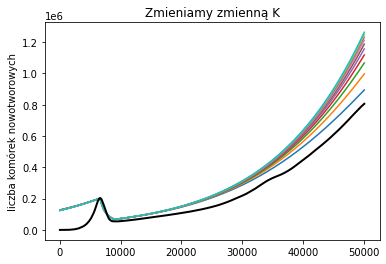

In [12]:
maximal ={'P0': 142730, 'C0': 3.1350094623894074, 'gamma_p': 0.0002899885604836935, 'KDE': 0.0004971029545181719, 'K': 424354.54431511427, 'eta': 0.2999968345615772, 'alpha': 5.000000000208709e-06, 'alpha_diff': 15.000000002287718, 'lambda_p': 7.500000001456923e-05}


params = maximal
from asymilacja.paramteres.Vis7LinspKlusekShortLinearEachIter import plot_parameters, plot_truth
from data.klusek.EP2.config import threatment_start, threatment_end,threatment2_start
from asymilacja.model.Cancer6LinspKlusekShortEachIterLinear import differentialEquation

USE_REAL_TIME = False
threatment_time = threatment_end - threatment_start
steps_backward = threatment_start
steps_forward = threatment2_start - threatment_start

df = pd.read_csv("data/klusek/EP2/stats0.csv")
df_true = df[(df['iteration'] >= 0) & (df['iteration']<=threatment2_start)]
P_true = list(df_true.prolif_cells)
t_true = list(df_true.iteration)
t_real = list(df_true.t)
params['P0'] = df_true.loc[threatment_start,"prolif_cells"]

params1 = copy(params)

mln=1000000
for K in np.linspace(2.3*mln,10*mln,10):
    params1['K'] = K
    plot_parameters(differentialEquation,params1,steps_forward,steps_backward,threatment_start,"6/6 threatmentTime",USE_REAL_TIME,t_real)

plot_truth(t_true,P_true, USE_REAL_TIME,t_real)

plt.title("Zmieniamy zmienną K")
# plt.legend()
plt.show()

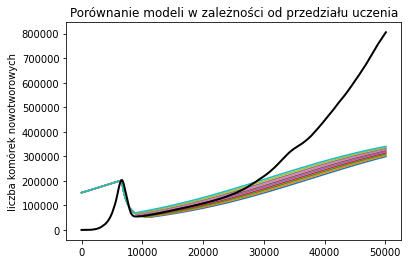

In [13]:
params1 = copy(params)

for eta in np.linspace(0.1,0.35,10):
    params1['eta'] = eta
    plot_parameters(differentialEquation,params1,steps_forward,steps_backward,threatment_start,"6/6 threatmentTime",USE_REAL_TIME,t_real)

plot_truth(t_true,P_true, USE_REAL_TIME,t_real)

plt.title("Porównanie modeli w zależności od przedziału uczenia")
plt.show()

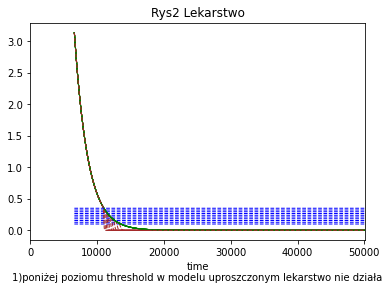

In [14]:
params1 = copy(params)
from asymilacja.paramteres.Vis7LinspKlusekShortLinearEachIter import plot_curement
steps_forward=threatment2_start-threatment_start
for eta in np.linspace(0.1,0.35,10):
    params1['eta'] = eta
    plot_curement(differentialEquation,params1,steps_forward,threatment_start,params_eta=None)

plt.show()

9.09941214460779
9.09941214460779


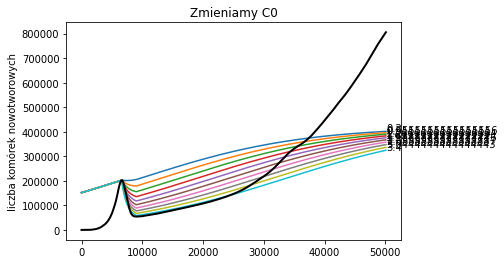

In [15]:
from scipy.integrate import odeint

params1 = copy(params)
# params1['KDE'] = 100
# params1['eta'] = 0.2
params1['eta'] =0.299999
params1['KDE'] = -np.log(params1['eta']/(threatment_time+200))
print(params1['KDE'] )
print(params1['KDE'] )
params1['KDE'] = 0.0005

for C0 in np.linspace(0.2,3.4,10):
    params1['C0'] = C0
    plot_parameters(differentialEquation,params1,steps_forward,steps_backward,threatment_start,"6/6 threatmentTime",USE_REAL_TIME,t_real,lineLabel=C0)

plot_truth(t_true,P_true, USE_REAL_TIME,t_real)

plt.title("Zmieniamy C0")
plt.show()

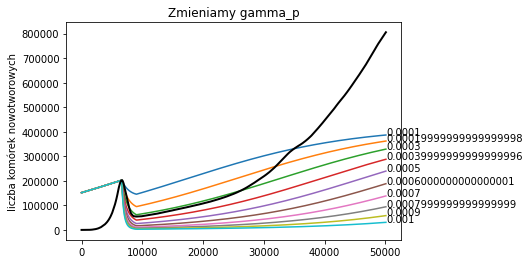

In [16]:


# params1['KDE'] = np.log(params1['eta']/threatment_time+200)

for gamma_p in np.linspace(0.0001,0.001,10):
    params1 = copy(params)
    params1['gamma_p'] = gamma_p
    plot_parameters(differentialEquation,params1,steps_forward,steps_backward,threatment_start,"6/6 threatmentTime",USE_REAL_TIME,t_real,lineLabel=gamma_p)

plot_truth(t_true,P_true, USE_REAL_TIME,t_real)

plt.title("Zmieniamy gamma_p")
plt.show()
# wniosek trzeba dopasować koniec terapii, czyli KDE

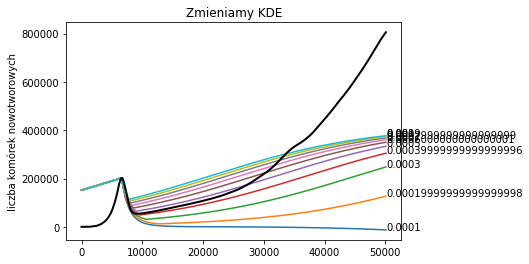

In [17]:
params1 = copy(params)


mln=1000000
for KDE in np.linspace(0.0001,0.001,10):
    params1['KDE'] = KDE
    plot_parameters(differentialEquation,params1,steps_forward,steps_backward,threatment_start,"6/6 threatmentTime",USE_REAL_TIME,t_real,lineLabel=KDE)

plot_truth(t_true,P_true, USE_REAL_TIME,t_real)

plt.title("Zmieniamy KDE")
plt.show()

# Training15_GS1
dPdt = lambda_p * P*(1-P/K) - gamma_p * unit_step_fun(C,eta)  * P

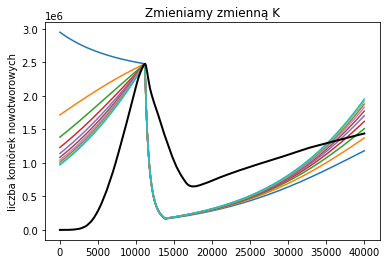

In [18]:
maximal ={'P0': 1578183, 'C0': 9.580054434387815, 'gamma_p': 0.00020043448148424222, 'K': 1800009.8388459147, 'eta': 0.2821441111244175, 'KDE': 0.00047284652698822814, 'lambda_p': 0.00010037182386318592}
params = maximal

from asymilacja.paramteres.Vis7LinspKlusekShortLinearEachIter import plot_parameters, plot_truth
from data.klusek.patient202205041854.config import threatment_start, threatment_end,threatment2_start
from asymilacja.model.Cancer6LinspKlusekShortEachIterLinear import differentialEquation_15

USE_REAL_TIME = False
threatment_time = threatment_end - threatment_start
steps_backward = threatment_start
steps_forward = threatment2_start - threatment_start

df = pd.read_csv("data/klusek/patient202205041854/stats0.csv")
df_true = df[(df['iteration'] >= 0) & (df['iteration']<=threatment2_start)]
P_true = list(df_true.prolif_cells)
t_true = list(df_true.iteration)
t_real = list(df_true.t)
params['P0'] = df_true.loc[threatment_start,"prolif_cells"]

params1 = copy(params)

mln=1000000
for K in np.linspace(2.3*mln,10*mln,10):
    params1['K'] = K
    plot_parameters(differentialEquation_15,params1,steps_forward,steps_backward,threatment_start,"6/6 threatmentTime",USE_REAL_TIME,t_real)

plot_truth(t_true,P_true, USE_REAL_TIME,t_real)

plt.title("Zmieniamy zmienną K")
# plt.legend()
plt.show()

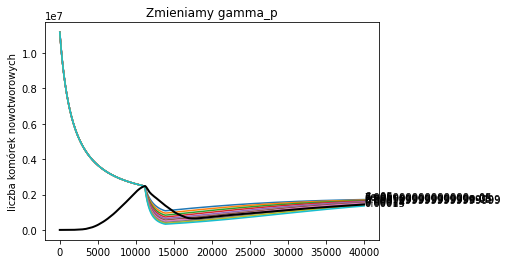

In [19]:
for gamma_p in np.linspace(0.00006,0.00015,10):
    params1 = copy(params)
    params1['gamma_p'] = gamma_p
    plot_parameters(differentialEquation_15,params1,steps_forward,steps_backward,threatment_start,"6/6 threatmentTime",USE_REAL_TIME,t_real,lineLabel=gamma_p)

plot_truth(t_true,P_true, USE_REAL_TIME,t_real)

plt.title("Zmieniamy gamma_p")
plt.show()

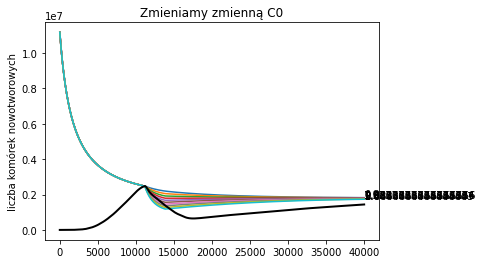

In [20]:
for C0 in np.linspace(0.2,3.4,10):
    params1['C0'] = C0
    plot_parameters(differentialEquation_15,params1,steps_forward,steps_backward,threatment_start,"6/6 threatmentTime",USE_REAL_TIME,t_real,lineLabel=C0)

plot_truth(t_true,P_true, USE_REAL_TIME,t_real)

plt.title("Zmieniamy zmienną C0")
plt.show()